In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import numpy as np
import os
import shutil

In [3]:
!mvn clean > console.txt

Página de códigos activa: 1252


In [4]:
!mvn package > console.txt 

Página de códigos activa: 1252


In [5]:
L = 20
rc = 1
r = 0.25
upper_bound = math.ceil(L/(rc + 2*r))
dif_N = [1000, 5000, 10000]
dif_M = [i for i in range(1, upper_bound, 1)]

In [8]:
def run_java(args=""):
    JAR_FILE = "target/SdS-TP1-1.0-SNAPSHOT.jar"
    MAIN_CLASS = "Main"

    if not os.path.isfile(JAR_FILE):
        print(f"No se encontró {JAR_FILE}")
        print("Compilando con Maven...")
        !mvn package

    # Ejecutar el JAR con los argumentos pasados
    !java {args} -cp {JAR_FILE} {MAIN_CLASS} > console.txt

def rename_file(src: str, dest: str):
        if os.path.exists(src):
            if os.path.exists(dest):
                os.remove(dest)
            shutil.move(src, dest)
        else:
            print(f"⚠ No se encontró {src}")

In [ ]:
if os.path.exists("rawtime.txt"):
  os.remove("rawtime.txt")
for N in dif_N:
  for M in dif_M:
    for _ in range(10):
      run_java(f"-DN={N} -Dgenerate=true -DL=20 -DM={M} -Drc=1 -Dr=0.25 -DID=3 -Dbound-periodicity=false")
    rename_file(src="rawtime.txt",dest=f"{N}_{M}.txt")

In [13]:
def cargar_tiempos(N, upper_bound):
    medias = []
    desvios = []
    valores_M = []

    for M in dif_M:
        nombre_archivo = f"{N}_{M}.txt"
        if not os.path.exists(nombre_archivo):
            continue

        with open(nombre_archivo) as f:
            tiempos = [float(line.strip()) for line in f if line.strip()]

        if len(tiempos) == 10:
            media = np.mean(tiempos)
            desvio = np.std(tiempos)
            medias.append(media)
            desvios.append(desvio)
            valores_M.append(M)

    return valores_M, medias, desvios

def graficar_para_N(N, upper_bound):
    M_vals, medias, desvios = cargar_tiempos(N, upper_bound)
    if not M_vals:
        print(f"No hay datos para N = {N}")
        return

    plt.errorbar(M_vals, medias, yerr=desvios, fmt='-o', capsize=5, label=f'N={N}')
    plt.xlabel("M")
    plt.ylabel("Tiempo medio (ms)")
    plt.title(f"Tiempo medio vs M (N={N})")
    plt.grid(True)
    plt.legend()
    plt.show()


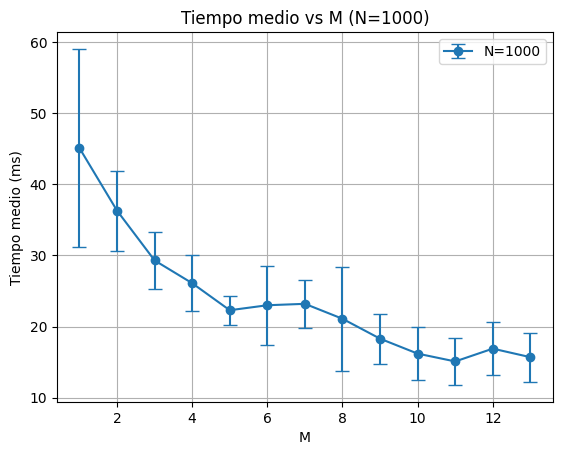

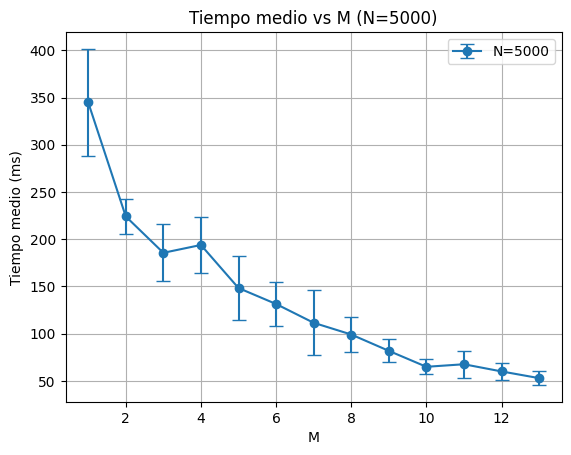

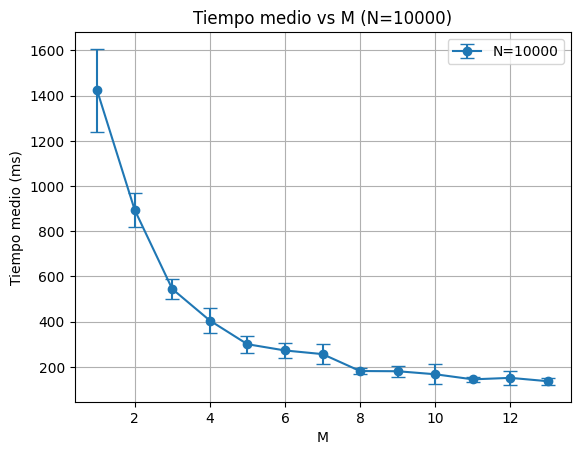

In [16]:
for N in dif_N:
  graficar_para_N(N, upper_bound)